<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Projeto de WordCloud</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            color: #333;
        }
        h1 {
            color: #007acc;
        }
        p {
            font-size: 16px;
        }
    </style>
</head>
<body>
    <h1>Olá, sou o Walisson!</h1>
    <p>Sou um entusiasta e estudioso em análise de dados e data science. Tenho me dedicado a praticar e aprimorar minhas habilidades no campo e este é um projeto sobre a <strong>nuvem de palavras</strong> das músicas da banda <strong>Linkin Park</strong>.</p>
    <p>Meu LinkedIn: <a href="https://www.linkedin.com/in/wacarv-/" target="_blank">Walisson Carvalho</a></p>
</body>
</html>

## <a>Nuvens de Palavras</a>

A nuvem de palavras ajuda na análise de dados ao visualizar rapidamente as palavras mais frequentes em um conjunto de texto. Palavras maiores e mais destacadas indicam maior frequência, facilitando a identificação de temas e padrões principais. É útil para resumir e compreender rapidamente o conteúdo textual.


In [27]:
#instalando algumas bibliotecas


!pip install notebook wordcloud pillow numpy bs4 tqdm

In [2]:
#bibliotecas


from bs4 import BeautifulSoup
import pandas as pd
import re
import requests
import os


In [3]:
url_base = 'http://www.mldb.org'

In [4]:
#realizando a requisição da web e verificando a disponibilidade do site

banda = 'artist-212-linkin-park.html'
req = requests.get(f'{url_base}/{banda}', headers={'User-Agent': 'Mozilla/5.0'})
print(req)

<Response [200]>


In [5]:
pagina = req.text

pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Linkin Park by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Linkin Park by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Linkin Park,Hybrid Theory (EP),One Step Closer,Opening,Queen Of The Damned,Hybrid Theory,Reanimation,Meteora,Collision Course,Minutes To Midnight,Transformers soundtrack,Twilight Soundtrack" />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Linkin Park by albums" />\n<meta name="distribution" content="Global" />\n<meta name="rating" content="general" />\n<link href="

In [6]:
#transformando o conteúdo da página em uma variável

soup = BeautifulSoup(pagina, 'html.parser')

print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Linkin Park by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Linkin Park by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Linkin Park,Hybrid Theory (EP),One Step Closer,Opening,Queen Of The Damned,Hybrid Theory,Reanimation,Meteora,Collision Course,Minutes To Midnight,Transformers soundtrack,Twilight Soundtrack" name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Linkin Park by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general" name="rating"/>
<link href="style.css" media="al

In [7]:
# Extraindo links das músicas
links = soup.find_all('a', {'href': re.compile(r'song-*')} )

len(links)

90

In [8]:
#verificando uma música aleatória

links[74]

<a href="song-237140-numb-encore.html">Numb / Encore</a>

In [9]:
!pip install tqdm

In [10]:
from tqdm import tqdm

# criando o diretório "data"
if not os.path.exists('./data'):
    os.makedirs('./data')

letras_linkpark = ''

with open('./data/arquivo_letras.txt', 'w') as letras:
    for link in tqdm(links):
        url_musica = link['href']
        url_completa = f'{url_base}/{url_musica}'

        req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

        soup_music = BeautifulSoup(req.text, 'html.parser')

        letra = soup_music.find('p', {'class': 'songtext'} )
        
        letras.write(f'{letra.text}\n')
        
        letras_linkpark += f'{letra.text}\n'


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [02:06<00:00,  1.41s/it]


In [11]:
letras_linkpark[70:105]

' flesh and blood\nLeft all alone\nFar'

In [12]:
# Organizar numa lista de palavras
tokens = letras_linkpark.split()

In [13]:
len(tokens)

30005

In [14]:
print(tokens)

['Where', 'should', 'I', 'start', 'Disjointed', 'heart', "I've", 'got', 'no', 'commitment', 'To', 'my', 'own', 'flesh', 'and', 'blood', 'Left', 'all', 'alone', 'Far', 'from', 'my', 'home', 'No', 'one', 'to', 'hear', 'me,', 'to', 'heal', 'my', 'ill', 'heart,', 'I', 'Keep', 'it', 'locked', 'up', 'inside', 'Cannot', 'express', 'To', 'the', 'point', "I've", 'regressed', 'If', "anger's", 'a', 'gift,', 'then', 'I', 'guess', "I've", 'been', 'blessed,', 'I', 'Keep', 'it', 'locked', 'up', 'inside', 'Keep', 'my', 'distance', 'from', 'your', 'lies', "It's", 'too', 'late', 'to', 'love', 'me', 'now', 'You', 'helped', 'me', 'to', 'show', 'me', "It's", 'too', 'late', 'to', 'love', 'me', 'now', 'You', "don't", 'take', 'a', 'word', 'in', 'Breaking', 'a', 'part', 'of', 'my', 'heart', 'to', 'find', 'release', 'Taking', 'you', 'out', 'of', 'my', 'blood', 'to', 'bring', 'me', 'peace', 'Breaking', 'a', 'part', 'of', 'my', 'heart', 'to', 'find', 'release', 'Taking', 'you', 'out', 'of', 'my', 'blood', 'to', '

In [15]:
tokens[4190]

'threats'

In [16]:
# convertendo todas as palavras para letras minúsculas
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower().strip()


In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [18]:
tokens[:20]

['where',
 'should',
 'i',
 'start',
 'disjointed',
 'heart',
 "i've",
 'got',
 'no',
 'commitment',
 'to',
 'my',
 'own',
 'flesh',
 'and',
 'blood',
 'left',
 'all',
 'alone',
 'far']

In [19]:
# criando uma única string com todas a músicas da banda, para o wordcloud
letras_linkpark = " ".join(tokens)

letras_linkpark[:165]

"where should i start disjointed heart i've got no commitment to my own flesh and blood left all alone far from my home no one to hear me, to heal my ill heart, i kee"

In [20]:
# imagem crua
wordcloud = WordCloud(background_color = 'black',
                #stopwords = stopwords_customizada,
                #contour_width = 1,
                #contour_color  = 'white',
                #colormap='Purples',
                random_state=42).generate(letras_linkpark)

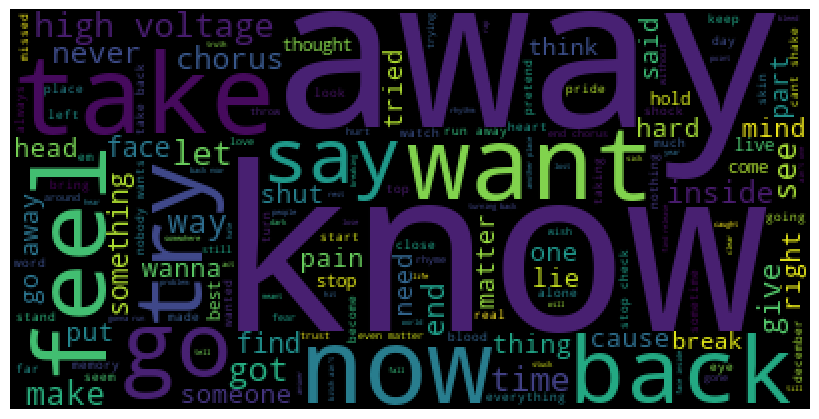

In [21]:
# "plotando" a imagem sem máscara
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [22]:
# abrindo imagem com o pillow e buscando uma máscara(ícone da banda)


imagem_mascara = np.array(Image.open(r"C:\Users\walis\Downloads\Linkin_Park_1.webp"))

print(imagem_mascara)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [23]:
wordcloud = WordCloud(background_color = 'black',
                    max_words = 1000,
                    mask=imagem_mascara,
                    #colormap='Purples',
                    random_state=42).generate(letras_linkpark)

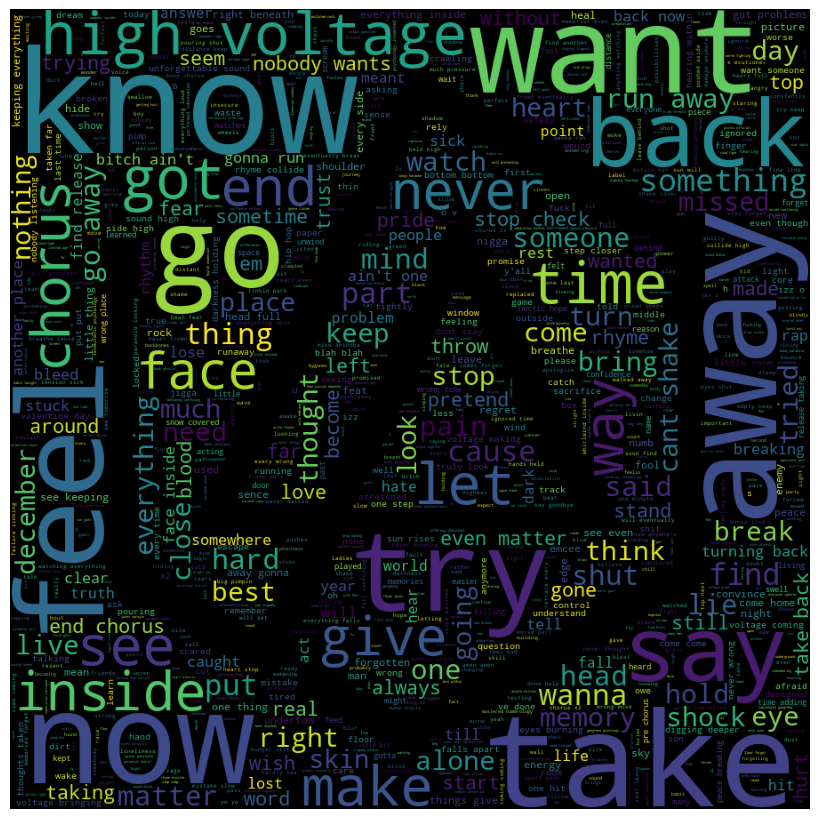

In [24]:
# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [25]:
#listando as palavas com suas respectivas quantidades

from collections import Counter

linkparkword_count = Counter(tokens)

linkparkword_count.most_common()

[('the', 1343),
 ('i', 1314),
 ('to', 1128),
 ('you', 878),
 ('and', 570),
 ('of', 518),
 ('me', 462),
 ('my', 443),
 ('a', 427),
 ('it', 407),
 ('in', 384),
 ('all', 296),
 ("i'm", 270),
 ('this', 263),
 ('like', 255),
 ('that', 255),
 ('is', 254),
 ('so', 240),
 ('with', 231),
 ('be', 213),
 ('what', 208),
 ('your', 207),
 ('but', 202),
 ('away', 194),
 ('on', 191),
 ('up', 189),
 ('out', 167),
 ("it's", 165),
 ('just', 157),
 ("can't", 155),
 ('back', 146),
 ('take', 132),
 ('know', 131),
 ('no', 130),
 ('for', 127),
 ('when', 124),
 ('from', 123),
 ('go', 116),
 ('now', 112),
 ('not', 112),
 ('do', 111),
 ("don't", 109),
 ('time', 108),
 ('want', 106),
 ("i've", 101),
 ('never', 99),
 ('see', 98),
 ('how', 97),
 ('myself', 96),
 ('feel', 96),
 ("you're", 96),
 ('one', 94),
 ('inside', 90),
 ('try', 89),
 ('find', 85),
 ('have', 85),
 ('high', 85),
 ('at', 83),
 ('got', 80),
 ('say', 80),
 ('if', 79),
 ('can', 79),
 ('voltage', 78),
 ('was', 78),
 ('again', 77),
 ('why', 76),
 ('eve

In [26]:
wordcloud.to_file(r'C:\Users\walis\Downloads\imagemlinkpark.png')